In [0]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt
from google.colab import files


from google.colab import drive
drive.mount('/content/gdrive')

import scipy.io.wavfile 

rate, data = scipy.io.wavfile.read('/content/gdrive/My Drive/output.wav')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


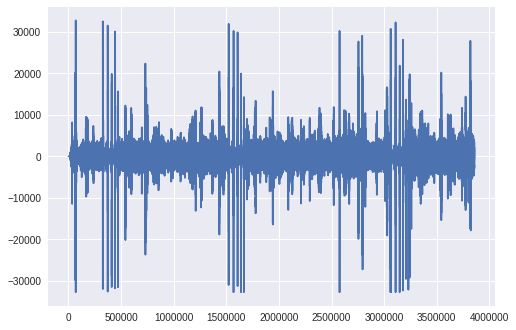

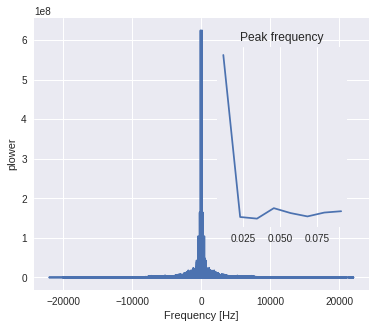

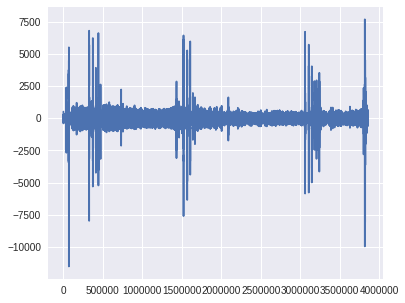

In [0]:
plt.plot(data)

# The FFT of the signal
sig_fft = fftpack.fft(data)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(data.size, d=(1/rate))

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(filtered_sig)



In [0]:
scipy.io.wavfile.write('/content/gdrive/My Drive/output1.wav', rate, filtered_sig.astype(data.dtype))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


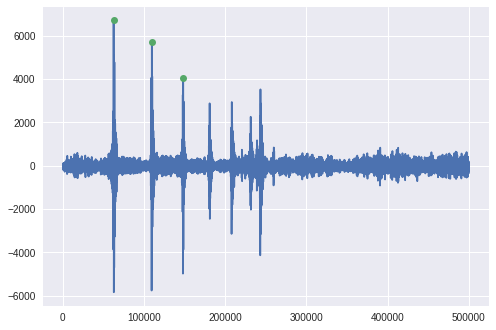

1.417528344671202
2.4854195011337867
1.067891156462585
1.337775016000278


In [0]:
from scipy.signal import find_peaks, find_peaks_cwt

peaks, _ = find_peaks(filtered_sig[3000000:3500000], height=0, width=150, prominence=8000, distance=2000) 
#peaks = find_peaks_cwt(data, np.arange(1,10))
plt.plot(filtered_sig[3000000:3500000])
plt.plot(peaks, filtered_sig[3000000:3500000][peaks], 'o')
#plt.plot(peaks, data[peaks], "x")
plt.show()

print(peaks[0] / rate)
print(peaks[1] / rate)

print((peaks[1] - peaks[0]) / rate)

print(1.23 * (((peaks[1] - peaks[0]) / rate) - 0.025) ** 2.0)